# Model Evaluation

The primary goal of machine learning is to develop models capable of identifying patterns in data. These models are typically trained for tasks like clustering or regression. The effectiveness of a model is evaluated based on its prediction accuracy when applied to unseen data. To improve model quality, the first step is to define evaluation metrics and scoring systems. These metrics, combined with evaluation methods, help in selecting the best strategies to enhance model performance. Some techniques for improving models include: 

1. Hyperparameter optimization
2. Training various models
3. Adjusting the train-test split during data partitioning

In this chapter, we will cover evaluation metrics, model selection methods, and practical techniques in Python, such as saving and loading models. Examples related to oil and gas problems will be used.

## Evaluation Metrics and Scoring

Several metrics assess the performance of machine learning models. For this chapter, metrics for binary classification, multinomial classification, and regression will be explored. Examples of widely used metrics for supervised classification include:

- Precision
- Accuracy
- Recall
- F1 Score
- Confusion Matrix

For unsupervised clustering, the **silhouette score** is recommended. For regression models, such as neural networks, the **mean squared error (MSE)** and **R²** are commonly used. Three examples—**sand production prediction**, **rock typing**, and **PVT estimation**—will be evaluated.

### Binary Classification: Prediction of Sand Production

Sand production is a frequent challenge in well operations, caused by factors like high flow rates, stress regimes, geomechanical rock properties, and completion design. Predicting sand production helps engineers devise control strategies. Using a dataset of 29 wells from the Northern Adriatic basin, a binary classifier model can be trained to predict whether a well will experience sand production.


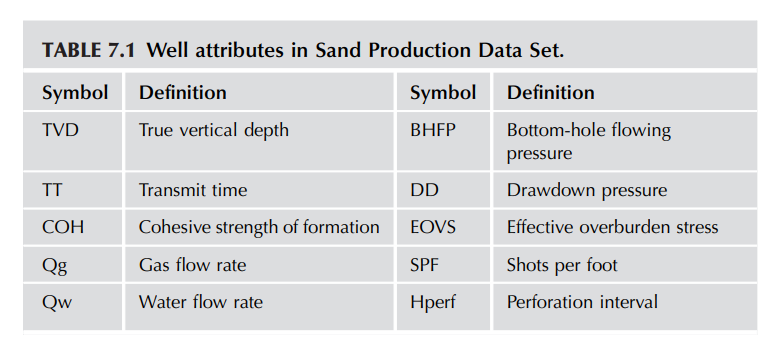

## Binary classification: prediction of sand production

# Step 1 - Data Loading

In [1]:
import pandas as pd
dataset = pd.read_csv('Chapter7_Sand Production.csv')
print(dataset.describe())

              No          TVD          TT        COH          Qg           Qw  \
count  29.000000    29.000000   29.000000  29.000000   29.000000    29.000000   
mean   15.000000  2664.172414  109.931034  19.293103   70.751724   542.230966   
std     8.514693  1027.947680   20.476347  11.056444   31.720460  1171.726103   
min     1.000000   319.000000   85.000000   5.500000   23.000000     0.000000   
25%     8.000000  1930.000000   98.000000  10.800000   48.000000    52.000000   
50%    15.000000  2983.000000  100.000000  19.500000   69.800000    85.000000   
75%    22.000000  3366.000000  120.000000  22.600000   93.400000   280.000000   
max    29.000000  4548.000000  170.000000  53.200000  139.500000  5672.000000   

             BHFP          DD        EOVS        SPF      Hperf  \
count   29.000000   29.000000   29.000000  29.000000  29.000000   
mean   185.113793   30.200000  435.586207   7.724138  10.965517   
std     62.763364   31.623466  217.682849   7.457722   5.499888   
mi

In [2]:
dataset.describe()

,No,TVD,TT,COH,Qg,Qw,BHFP,DD,EOVS,SPF,Hperf,Sand Production Observed
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,15.000000,2664.172414,109.931034,19.293103,70.751724,542.230966,185.113793,30.200000,435.586207,7.724138,10.965517,0.724138
std,8.514693,1027.947680,20.476347,11.056444,31.720460,1171.726103,62.763364,31.623466,217.682849,7.457722,5.499888,0.454859
min,1.000000,319.000000,85.000000,5.500000,23.000000,0.000000,67.000000,0.700000,111.000000,1.000000,3.500000,0.000000
25%,8.000000,1930.000000,98.000000,10.800000,48.000000,52.000000,140.400000,8.000000,242.000000,4.000000,6.000000,0.000000
50%,15.000000,2983.000000,100.000000,19.500000,69.800000,85.000000,184.600000,16.600000,492.000000,4.000000,11.000000,1.000000
75%,22.000000,3366.000000,120.000000,22.600000,93.400000,280.000000,222.100000,47.400000,601.000000,8.500000,15.500000,1.000000
max,29.000000,4548.000000,170.000000,53.200000,139.500000,5672.000000,302.200000,124.400000,823.000000,33.000000,21.000000,1.000000


In [3]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No,29.0,15.000000,8.514693,1.0,8.0,15.0,22.0,29.0
TVD,29.0,2664.172414,1027.947680,319.0,1930.0,2983.0,3366.0,4548.0
TT,29.0,109.931034,20.476347,85.0,98.0,100.0,120.0,170.0
COH,29.0,19.293103,11.056444,5.5,10.8,19.5,22.6,53.2
Qg,29.0,70.751724,31.720460,23.0,48.0,69.8,93.4,139.5
Qw,29.0,542.230966,1171.726103,0.0,52.0,85.0,280.0,5672.0
BHFP,29.0,185.113793,62.763364,67.0,140.4,184.6,222.1,302.2
DD,29.0,30.200000,31.623466,0.7,8.0,16.6,47.4,124.4
EOVS,29.0,435.586207,217.682849,111.0,242.0,492.0,601.0,823.0
SPF,29.0,7.724138,7.457722,1.0,4.0,4.0,8.5,33.0


# Step 2
* Data scaling, partitioning, and training KNN model can be done
with the following codes.

In [2]:
# Define input(x) and target(y)
x = dataset.iloc[:,1:11]
y = dataset.iloc[:,11].values

# Scale input data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
xnorm = pd.DataFrame(data = sc.fit_transform(x))


# Partition data into test and train
import numpy as np
seed = 50
np.random.seed(seed)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xnorm, y, test_size = 0.3)


# Train binary classifier (k-neighbor) and predict on train and test data
# set
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors = 3, leaf_size = 3)
KNC.fit(x_train, y_train)

y_train_predict = KNC.predict(x_train)
y_test_predict = KNC.predict(x_test)

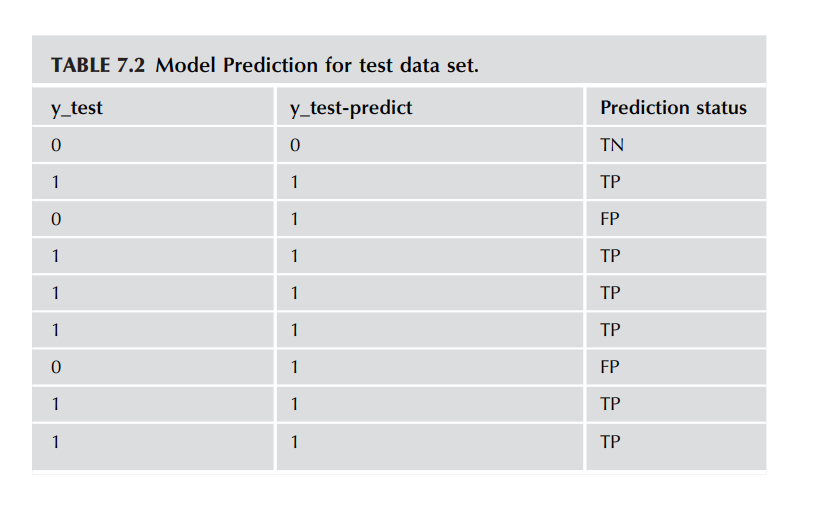

# Accuracy
The first evaluation metric is **accuracy**, which is the ratio of correct predictions to the total number of predictions. The results of a trained K-Nearest Neighbors (KNN) model on the test dataset are summarized below.

In the test dataset, there are nine observations: six wells produced sand (labeled as 1), and three wells experienced no sand production (labeled as 0). The prediction outcomes are categorized as follows:

- **True Positive (TP)**: When the model correctly predicts sand production (value = 1). There are 5 TPs in this example.
- **True Negative (TN)**: When the model correctly predicts no sand production (value = 0). There is 1 TN in this case.
- **False Positive (FP)** (Type I Error): When the model incorrectly predicts sand production (value = 1) for a well that didn't produce sand. There are 2 FPs in this example.
- **False Negative (FN)** (Type II Error): When the model incorrectly predicts no sand production (value = 0) for a well that actually produced sand. In this case, there are no FNs.

This breakdown helps evaluate how well the model classifies sand production in wells.


In Python, the `accuracy of a classification problem` can be calculated with
the following code:

In [7]:
from sklearn.metrics import accuracy_score

accuracy_test = accuracy_score(y_test, y_test_predict)
print('Accuracy_test: %f' % accuracy_test)

Accuracy_test: 0.777778


# Precision
* In binary classification, **accuracy** may not be a reliable metric when the classes are imbalanced (Albon, 2018). For example, in the oil and gas industry, events like well blowouts or severe pipeline leakages/oil spills are rare, creating highly imbalanced datasets. In such cases, a better metric is **precision**, which is defined as the ratio of **true positives (TP)** to all positive predictions made by the model (both true positives and false positives).

* It is important to note that the class with fewer samples, such as well blowouts, is typically considered the positive class.


In [8]:
from sklearn.metrics import precision_score

precision_test = precision_score(y_test, y_test_predict)
print('Precision_test: %f' % precision_test)

Precision_test: 0.750000


# Recall
The other evaluation metric for the classification problem is `"Recall"`.
    
* It is
defined as what proportion of all positive values are correctly predicted positives.
    
* All positive values include `both TPs and FNs` (FN is actually a positive
value which is incorrectly predicted as negative).
    
* Recall identifies the ability of
the model to predict positive values.

In [9]:
from sklearn.metrics import recall_score

recall_test = recall_score(y_test, y_test_predict)
print('Recall_test: %f' % recall_test)

Recall_test: 1.000000


# F1 - Score
Selecting the appropriate evaluation metric depends on the objective of the classification problem. In some cases, achieving high **precision** is critical, while in others, high **recall** is necessary. To strike a balance between precision and recall, the **F1 score** is used. The F1 score is the harmonic mean of precision and recall.

Given that:

- **Precision** is the ratio of true positives (TP) to all predicted positives
- **Recall** is the ratio of true positives (TP) to all actual positives

The **F1 score** can be defined as:

$$F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$


In [10]:
from sklearn.metrics import f1_score

f1_test = f1_score(y_test, y_test_predict)
print('F1 score_train: %f' % f1_test)

F1 score_train: 0.857143


In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         6

    accuracy                           0.78         9
   macro avg       0.88      0.67      0.68         9
weighted avg       0.83      0.78      0.74         9



## Multiclass classification: facies classification
* In this problem, the objective is to estimate rock facies for a gas reservoir
in Kansas. Data were gathered from nine wells with different logs.

* The whole
data set includes nine rock classes or facies (model output), with seven log
attributes as input or predictor variables. There are 3232 samples in this
example.

* Facies classes and log attributes are shown in Tables 7.3 and 7.4.

* In this problem, the goal is to train a classification model that predicts each
class for new (test) data.

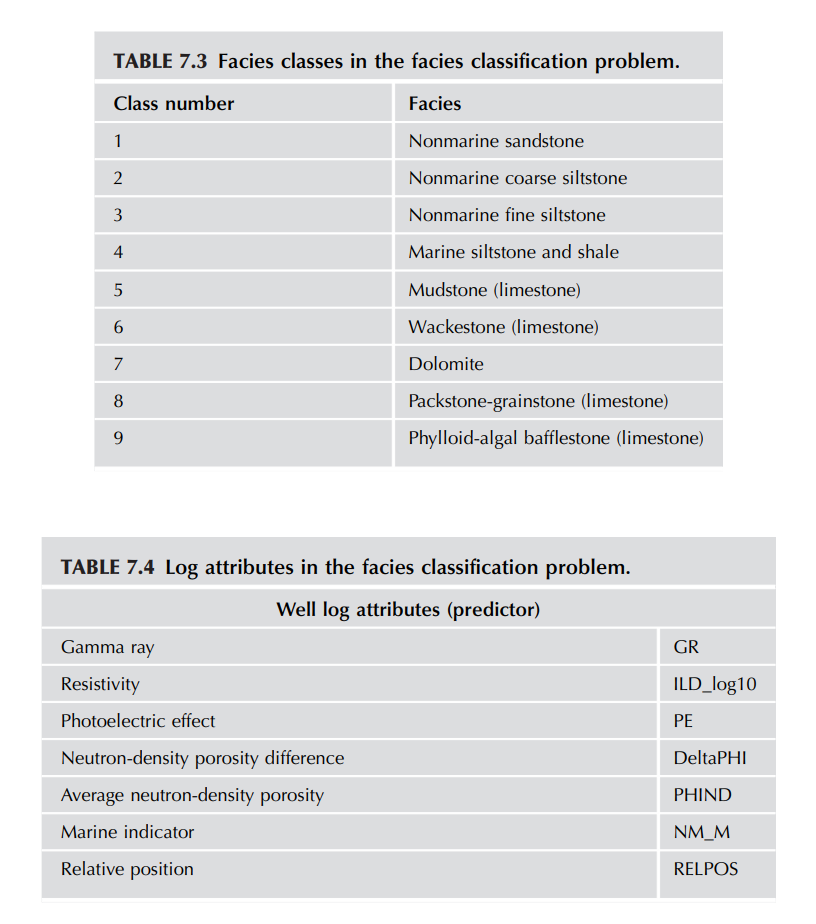

In [13]:
#Import the data and print descriptive statistics
import pandas as pd
import seaborn as sns

dataset = pd.read_csv('Chapter7_Facies Data.CSV')
print(dataset.describe())


x = dataset.iloc[:,4:11]
y = dataset.iloc[:,0].values


#Scale the input data from 0 to 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
xnorm = pd.DataFrame(data = sc.fit_transform(x))


#Partition the data into train and test
from sklearn.model_selection import train_test_split
seed = 50
x_train, x_test, y_train, y_test = train_test_split(xnorm, y, random_state=1,
                                                   test_size = 0.25)


#Import logistic regression and train the model
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression(max_iter=200).fit(x_train, y_train)
y_predict = LG.predict(x_test)

            Facies        Depth           GR    ILD_log10     DeltaPHI  \
count  3232.000000  3232.000000  3232.000000  3232.000000  3232.000000   
mean      4.422030  2875.824567    66.135769     0.642719     3.559642   
std       2.504243   131.006274    30.854826     0.241845     5.228948   
min       1.000000  2573.500000    13.250000    -0.025949   -21.832000   
25%       2.000000  2791.000000    46.918750     0.492750     1.163750   
50%       4.000000  2893.500000    65.721500     0.624437     3.500000   
75%       6.000000  2980.000000    79.626250     0.812735     6.432500   
max       9.000000  3122.500000   361.150000     1.480000    18.600000   

             PHIND           PE         NM_M       RELPOS  
count  3232.000000  3232.000000  3232.000000  3232.000000  
mean     13.483213     3.725014     1.498453     0.520287  
std       7.698980     0.896152     0.500075     0.286792  
min       0.550000     0.200000     1.000000     0.010000  
25%       8.346750     3.100000  

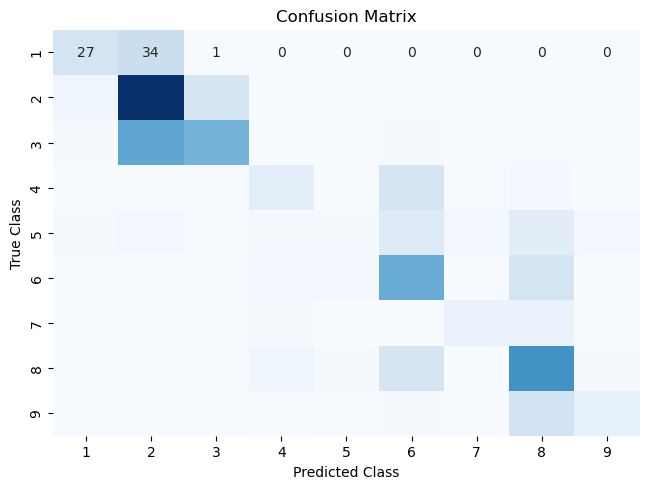

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_predict)
cv = np.arange(1,10)
dataframe = pd.DataFrame(matrix,index = cv, columns = cv)

# Create heatmap
sns.heatmap(dataframe, annot = True, cbar = None, cmap = "Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [15]:
from sklearn.metrics import classification_report
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           1       0.71      0.44      0.54        62
           2       0.56      0.81      0.66       185
           3       0.70      0.46      0.55       156
           4       0.47      0.33      0.38        46
           5       0.29      0.04      0.07        50
           6       0.50      0.67      0.57       113
           7       0.62      0.45      0.53        22
           8       0.52      0.71      0.60       131
           9       0.71      0.28      0.40        43

    accuracy                           0.56       808
   macro avg       0.56      0.46      0.48       808
weighted avg       0.57      0.56      0.54       808



# Cross-Validation

Several evaluation metrics help assess how well a machine learning model performs on unseen test data. Typically, the dataset is split into training and testing sets in a 70/30 ratio. The model is trained using the training set and evaluated on the test set. However, this approach has some drawbacks, as the evaluation results may be biased by the specific samples selected in the test set. Additionally, the model loses some data (test set) that could be used for training. To address these issues and achieve a more generalized model evaluation across the entire dataset, **cross-validation** is recommended.

## K-Fold Cross-Validation

The most common form of cross-validation is **k-fold cross-validation**, where the dataset is divided into **k** equal "folds." The value of **k** is typically between 5 and 10. 

1. In the first iteration, the first fold is used as the test set, while the remaining **k-1** folds are used for training.
2. The model is trained on the training folds, and the metric score is calculated using the test fold (fold 1).
3. In the next iteration, the second fold becomes the test set, and the remaining folds serve as the training set.
4. The model is trained on these new training folds, and the score is determined on fold 2.

This process continues until the model has been trained and evaluated **k** times, with each fold serving as the test set once. The evaluation scores from each iteration are averaged and reported at the end, providing a more reliable assessment of the model's performance.


# Cross-validation for classification

In Python, cross-validation can be performed using the **`cross_val_score`** function from the **scikit-learn** library. This function requires at least five key parameters:

1. **Model**: The machine learning model used for training and evaluation.
2. **Input data**: The features or independent variables of the dataset.
3. **Output data**: The target or dependent variable of the dataset.
4. **Number of folds**: The value of **k** for k-fold cross-validation (default is 3).
5. **Metric score**: The evaluation metric used to assess the model's performance.

This function simplifies the process of running cross-validation and returns the scores for each fold.


In [25]:
# Using KNN as the binary classifier
from sklearn.model_selection import cross_val_score

scores = cross_val_score(KNC, xnorm, y, cv = 5, scoring = 'accuracy')

print("Cross-validation scores: {}". format(scores))
print("Average cross-validation score: {}". format(scores.mean()))

Cross-validation scores: [0.49459042 0.438949   0.41640867 0.44117647 0.45975232]
Average cross-validation score: 0.45017537479483777


In [26]:
# Using Logistic Regression as the binary classifier
from sklearn.model_selection import cross_val_score

scores_kfold = cross_val_score(LG, xnorm, y,cv = 5)

print("Kfold Cross-validation scores: {}". format(scores_kfold))
print("Average Kfold cross-validation score: {}". format(scores_kfold.mean()))

Kfold Cross-validation scores: [0.52704791 0.53323029 0.48916409 0.48297214 0.57275542]
Average Kfold cross-validation score: 0.5210339695953221


# Cross-Validation for Regression

To apply **k-fold cross-validation** to a regression model, we will use the **PVT estimation** problem from Chapter 6. In this problem, 249 PVT samples containing **temperature**, **solution gas to oil ratio (RS)**, **gas gravity**, and **Oil API** were used to correlate with **bubble point pressure** using neural networks.

After training the neural networks, **R²** and **MSE** were calculated for both the training and test datasets. Now, five-fold cross-validation will be added to obtain **MSE** and **R²** for each fold using the following Python code:

```python
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Assuming neural_net is the trained model and X, y are the input and output data
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# 5-fold cross-validation for MSE
mse_scores = cross_val_score(neural_net, X, y, cv=5, scoring=mse_scorer)
print("MSE for each fold: ", mse_scores)

# 5-fold cross-validation for R²
r2_scores = cross_val_score(neural_net, X, y, cv=5, scoring=r2_scorer)
print("R² for each fold: ", r2_scores)


In [9]:
import pandas as pd
dataset = pd.read_csv('Chapter7_PVT Data.csv')

X = dataset.iloc[:,0:4]
y = dataset.iloc[:,4].values

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

Xnorm = pd.DataFrame(data = sc.fit_transform(X))
yshape = pd.DataFrame(data = y.reshape(-1,1))
ynorm = pd.DataFrame(data = sc.fit_transform(yshape))

import numpy as np
seed = 50
np.random.seed(seed)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xnorm, ynorm,
                                                  test_size = 0.3)

from sklearn.neural_network import MLPRegressor

np.random.seed(seed)
clf = MLPRegressor(hidden_layer_sizes = (7), activation = 'tanh',
                   solver = 'lbfgs', alpha = 1, learning_rate_init = 0.1,
                   max_iter = 200, random_state = None, tol = 0.01)

y_train_Ravel = y_train.values.ravel()
clf.fit(X_train,y_train_Ravel)

MLPRegressor(activation='tanh', alpha=1, hidden_layer_sizes=7,
             learning_rate_init=0.1, solver='lbfgs', tol=0.01)

In [38]:
import numpy as np
seed = 50
np.random.seed(seed)

y_norm_Ravel = ynorm.values.ravel()

from sklearn.model_selection import cross_val_score

scores_MSE = cross_val_score(clf, Xnorm, y_norm_Ravel, cv = 5,
                             scoring = 'neg_mean_squared_error')

print("MSE_ Cross-validation scores: {}". format(scores_MSE))
print(" Average Kfold cross-validation MSE_score: {}". format(scores_MSE.mean()))
 
scores_R2 = cross_val_score(clf, Xnorm, y_norm_Ravel, cv = 5, scoring = 'r2')

print(" R2_Cross-validation scores: {}". format(scores_R2))
print(" Average R2_Cross-validation scores: {}". format(scores_R2.mean()))

MSE_ Cross-validation scores: [-0.0055198  -0.00155995 -0.01205835 -0.01779542 -0.00282173]
 Average Kfold cross-validation MSE_score: -0.007951048760489155
 R2_Cross-validation scores: [0.93905578 0.7947706  0.94509814 0.63662807 0.89653764]
 Average R2_Cross-validation scores: 0.8424180443306881


# Conclusion
* In PVT estimation problem’s cross-validation, the R2 ranges from 0.64 to
0.95 with an average value of 0.84 which is a reasonably good value for model
performance.

# Stratified K-fold cross-validation

In [44]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
scoresSK = cross_val_score(KNC, xnorm, y ,cv = skfold, scoring = 'accuracy')

print(" StratifiedKFold Cross-validation scores: {}". format(scoresSK))

print(" Average StratifiedKFold cross-validation score: {}".\
      format(scoresSK.mean()))

 StratifiedKFold Cross-validation scores: [1.         0.83333333 0.83333333 0.83333333 1.        ]
 Average StratifiedKFold cross-validation score: 0.9


# Leave One Out Cross-Validation Method
* In this method, the
number of folds is the same as the number of samples in the data set. The
number of models that would be trained is the same as samples. If the number
of samples is high, this method can be computationally exhaustive since it is
required to have trained models equal to the number of data samples.

In [45]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

scores_loo = cross_val_score(LG, xnorm, y, cv = loo)
print(" Number of cv iterations-Leave one Out: ", len(scores_loo))
print(" Mean accuracy Leave one Out: {}". format(scores_loo.mean()))

 Number of cv iterations-Leave one Out:  29
 Mean accuracy Leave one Out: 0.7586206896551724


# Shuffle_Split
* In this
method, it is necessary to define the number of iterations or splits. Then, the
percentage of the test and train should be specified. In each split, the data set
would be partitioned into train and test based on a specified percentage.

* In
Shuffle-Split cross-validation, there is control over the percentage of data for
testing the model in each split.

In [46]:
from sklearn.model_selection import ShuffleSplit
sh_sp = ShuffleSplit(test_size =.25, train_size =.75, n_splits = 5,
                     random_state=50)

scoresSP = cross_val_score(KNC, xnorm, y, cv = sh_sp)
print(" Cross-validation scores:{}". format(scoresSP))
print(" Mean accuracy: {}". format(scoresSP.mean()))

 Cross-validation scores:[0.75 1.   0.75 0.75 0.75]
 Mean accuracy: 0.8


In [47]:
from sklearn.model_selection import ShuffleSplit

sh_sp = ShuffleSplit(test_size =.25, train_size =.75, n_splits = 6,
                     random_state=50)

scores_SP = cross_val_score(LG, xnorm, y, cv = sh_sp)
print(" Cross-validation scores:{}". format(scores_SP))
print(" Mean accuracy: {}". format(scores_SP.mean()))

 Cross-validation scores:[0.625 0.625 0.875 0.625 0.875 0.625]
 Mean accuracy: 0.7083333333333334


In [48]:
import numpy as np
seed=50
np.random.seed(seed)
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


sh_sp = ShuffleSplit(test_size =.3, train_size =.7, n_splits = 8,
                     random_state=50)

scores = cross_val_score(clf, Xnorm, y_norm_Ravel, cv = sh_sp, scoring='r2')

print(" Cross-validation scores:{}". format(scores))
print(" Mean R2: {}". format(scores.mean()))

 Cross-validation scores:[0.89955581 0.94445178 0.77980894 0.78714374 0.94654158 0.91353788
 0.79064149 0.84369953]
 Mean R2: 0.8631725957628642


# Grid Search for Hyperparameter Optimization
* In order to optimize model performance and get the best set of hyperparameters, one should first generate a wide variety of combinations for
hyperparameters.
                                                                                                                                        
* Then, by searching through combinations for hyperparameters, it is possible to find the combination that returns the highest
model’s performance.
                                                              
* Finding the best set of hyperparameters by searching
through all the combinations can be done by `"grid search."`

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#Define k-nearest neighbor's combination of hyper-parameters
highest_score = 0
i = 0

for n in [2,3,4,5]:
    
    for w in['uniform','distance']:
        
        for l in[2,3,4]:

#Train a model with each combination of hyper-parameters and
#calculate the accuracy
            
            KNCG = KNeighborsClassifier(n_neighbors = n,
                weights = w, leaf_size = l)

            scores = cross_val_score(KNCG, xnorm, y,
                cv = 5, scoring = 'accuracy')
            
            scoreg = scores.mean()

            print("iteration:",i," score:",scoreg," NN:",n,
                  " weight:",w," leaf size:",l)

            i += 1

#Find the hyper-parameters that returns a model with the highest
#accuracy score
            if scoreg >= highest_score:
                highest_score = scoreg
                best_parameters = {' n_neighbors':n, 'weights': w,
                                   'leaf_size':l}
                
print(" Highest score: ", (highest_score))
print(" Best parameters: ", format(best_parameters))

iteration: 0  score: 0.8933333333333333  NN: 2  weight: uniform  leaf size: 2
iteration: 1  score: 0.8933333333333333  NN: 2  weight: uniform  leaf size: 3
iteration: 2  score: 0.8933333333333333  NN: 2  weight: uniform  leaf size: 4
iteration: 3  score: 0.9  NN: 2  weight: distance  leaf size: 2
iteration: 4  score: 0.9  NN: 2  weight: distance  leaf size: 3
iteration: 5  score: 0.9  NN: 2  weight: distance  leaf size: 4
iteration: 6  score: 0.8666666666666666  NN: 3  weight: uniform  leaf size: 2
iteration: 7  score: 0.8666666666666666  NN: 3  weight: uniform  leaf size: 3
iteration: 8  score: 0.8666666666666666  NN: 3  weight: uniform  leaf size: 4
iteration: 9  score: 0.8666666666666666  NN: 3  weight: distance  leaf size: 2
iteration: 10  score: 0.8666666666666666  NN: 3  weight: distance  leaf size: 3
iteration: 11  score: 0.8666666666666666  NN: 3  weight: distance  leaf size: 4
iteration: 12  score: 0.7533333333333333  NN: 4  weight: uniform  leaf size: 2
iteration: 13  score: 

# Grid Search Cross Validation
- Iterations 3, 4, and 5 yield the highest scores.
- The best combination of hyperparameters includes:
  - 2 nearest neighbors (NN)
  - "distance" weights
  - Leaf sizes of "2, 3, 4"
- This combination results in the highest accuracy score of 0.9.
- To perform grid search with cross-validation, the `GridSearchCV` method from the sklearn library is used.
  - Hyperparameters to be tuned are passed as a dictionary.
  - The model type (KNN in this example) is also passed as a parameter.
- The `GridSearchCV` method trains the model based on the best hyperparameter combination.
- For the sand production problem, the outputs of the best model are calculated and compared with actual target values using a classification report.


In [5]:
#Grid Search with Cross-validation
from sklearn.model_selection import GridSearchCV

Neighbor = [2,3,4,5]
Weight = ['uniform','distance']
Leaf = [2,3,4]

hyperparameters = dict(n_neighbors=Neighbor, weights=Weight, leaf_size=Leaf)

KNN = KNeighborsClassifier()
gridsearch = GridSearchCV(KNN, hyperparameters, cv = 5)
Best_Model = gridsearch.fit(xnorm, y)

print('Best n_neighbors:', Best_Model.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', Best_Model.best_estimator_.get_params()['weights'])
print('Best leaf_size:', Best_Model.best_estimator_.get_params()['leaf_size'])

B = Best_Model.predict(xnorm)

from sklearn.metrics import classification_report
print(classification_report(y, B))

Best n_neighbors: 2
Best weights: distance
Best leaf_size: 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        21

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



# Randomized Search Cross Validation
- The best model from the grid search uses the following hyperparameters:
  - Number of neighbors: 2
  - Weights: "distance"
  - Leaf size: 2
- Grid search can be computationally exhaustive when there are many hyperparameter combinations.
- To improve efficiency, a random search through hyperparameter combinations can be used.
  - In Python, the `RandomizedSearchCV` method from sklearn library is used for randomized hyperparameter search.
- Similar to grid search, `RandomizedSearchCV` requires the following input parameters:
  - Model type
  - Hyperparameter space
  - Number of cross-validation folds
- Additionally, the number of iterations (randomly selected hyperparameter combinations) must be defined.
  - The default number of iterations is 10.
- Python code for randomized hyperparameter search for the sand production problem is provided.


In [6]:
from sklearn.model_selection import RandomizedSearchCV

Neighbor = [2,3,4,5]
Weight = ['uniform','distance']
Leaf = [2,3,4]

hyperparameters = dict(n_neighbors = Neighbor, weights = Weight, leaf_size = Leaf)

KNN = KNeighborsClassifier()

gridsearch_randomized = RandomizedSearchCV(KNN, hyperparameters, n_iter = 12, 
                                           random_state = 1, cv = 5)

Best_Model = gridsearch_randomized.fit(xnorm, y)

print('Best n_neighbors:', Best_Model.best_estimator_.get_params()['n_neighbors'])

print('Best weights:', Best_Model.best_estimator_.get_params()['weights'])

print('Best leaf_size:', Best_Model.best_estimator_.get_params()['leaf_size'])

BRG = Best_Model.predict(xnorm)
from sklearn.metrics import classification_report
print(classification_report(y, BRG))

Best n_neighbors: 2
Best weights: distance
Best leaf_size: 4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        21

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



## Grid Search for Multiclass classification
- The previous example applied a grid search to a binary classification problem.
- In the next example, a grid search is used for a multiclass classification problem (facies classification).
- "Logistic regression" is used as the classification model.
- Two hyperparameters are tuned:
  - "Penalty" (l1 or l2)
  - "Inverse of regularization strength" denoted as $C$
- For $C$, 20 values between 1 and 10000 are selected on a logarithmic scale.
- The goal is to find the best combination of "penalty" and $C$ that maximizes model accuracy.
- Python code for grid search on the facies classification problem is provided.


In [8]:
from sklearn.model_selection import GridSearchCV

penalty = ['l1','l2']
C = np.logspace(0,4,20)

LRG = LogisticRegression(multi_class='auto',solver='liblinear',max_iter=200)

hyperparameters = dict(C = C, penalty = penalty)
gridsearch = GridSearchCV(LRG, hyperparameters, cv = 5, verbose = 0)

Best_Model = gridsearch.fit(xnorm, y)

print('Best penalty:', Best_Model.best_estimator_.get_params()['penalty'])
print('Best C:', Best_Model.best_estimator_.get_params()['C'])

B = Best_Model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, B))

Best penalty: l2
Best C: 48.32930238571752
              precision    recall  f1-score   support

           1       0.60      0.58      0.59        62
           2       0.59      0.68      0.63       185
           3       0.66      0.56      0.60       156
           4       0.56      0.48      0.52        46
           5       0.33      0.08      0.13        50
           6       0.53      0.67      0.59       113
           7       0.44      0.50      0.47        22
           8       0.58      0.66      0.62       131
           9       0.79      0.63      0.70        43

    accuracy                           0.59       808
   macro avg       0.57      0.54      0.54       808
weighted avg       0.58      0.59      0.58       808



In [10]:
# PVT Data
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
import numpy as np

seed = 50
np.random.seed(seed)

hyperparameters= [{'hidden_layer_sizes': [2,3,4,5,6,7],
                   'activation':['relu','tanh'],
                   'solver':['lbfgs'], 
                   'alpha':[0.0001,0.001,0.01,0.1,1,10],
                   'batch_size':['auto'],
                   'learning_rate':['constant'], 
                   'learning_rate_init':[0.001,0.01,0.1,1],
                   'max_iter':[500]}]

MLPR = MLPRegressor()

gridsearch = GridSearchCV(MLPR, hyperparameters, cv = 5, verbose = 0)

y_norm_Ravel = ynorm.values.ravel()

Best_Model = gridsearch.fit(Xnorm, y_norm_Ravel)

print('hidden_layer_sizes:',
      Best_Model.best_estimator_.get_params()['hidden_layer_sizes'])

print('Best activation:',
      Best_Model.best_estimator_.get_params()['activation'])

print('Best alpha:',
      Best_Model.best_estimator_.get_params()['alpha'])

print('Best learning_rate_init:',
      Best_Model.best_estimator_.get_params()['learning_rate_init'])

from sklearn.model_selection import cross_val_score
y_norm_Ravel = ynorm.values.ravel()
scores_R2 = cross_val_score(Best_Model.best_estimator_,Xnorm, y_norm_Ravel,
                            cv=5, scoring='r2')

print(" R2_Cross-validation scores: {}". format(scores_R2))
print(" Average R2_Cross-validation scores: {}". format(scores_R2.mean()))

hidden_layer_sizes: 5
Best activation: tanh
Best alpha: 0.0001
Best learning_rate_init: 0.1
 R2_Cross-validation scores: [0.99235881 0.99299502 0.99703024 0.99494016 0.99181029]
 Average R2_Cross-validation scores: 0.9938269064089317


## Reducing runtime using Randomized Grid Search
*  By
performing cross-validation over the whole PVT data set using the best model,
average R2 for five-fold is 0.99 which is very high.

* This grid search needed a
long run time to be completed.

* As mentioned earlier, in order to perform a grid
search in a shorter time, it is possible to perform a `randomized grid search`.

* Applying a randomized grid search for PVT estimation problem can be done
with the following Python codes:

In [11]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

seed = 50
np.random.seed(seed)

hyperparametersR = {'hidden_layer_sizes': [2,3,4,5,6,7],
                    'activation': ['relu','tanh'],
                    'solver':['lbfgs'], 
                    'alpha':[0.0001,0.001,0.01,0.1,1,10],
                    'batch_size':['auto'],
                    'learning_rate':['constant'],
                    'learning_rate_init':[0.001,0.01,0.1,1], 
                    'max_iter':[200]}

from sklearn.neural_network import MLPRegressor
MLPR = MLPRegressor()

seed = 50
np.random.seed(seed)

gridsearchR = RandomizedSearchCV(MLPR, hyperparametersR, random_state=1,
                                 cv=5, verbose=0, n_jobs=-1)

Best_ModelR=gridsearchR.fit(Xnorm, y_norm_Ravel)
print('hidden_layer_sizes:',
      Best_ModelR.best_estimator_.get_params()['hidden_layer_sizes'])

print('Best activation:',
      Best_ModelR.best_estimator_.get_params()['activation'])

print('Best alpha:', 
      Best_ModelR.best_estimator_.get_params()['alpha'])

print('Best learning_rate_init:',
      Best_ModelR.best_estimator_.get_params()['learning_rate_init'])

from sklearn.model_selection import cross_val_score

scores_R2R = cross_val_score (Best_ModelR.best_estimator_, Xnorm, y_norm_Ravel,
                              cv=5, scoring='r2')

print(" R2_Cross-validation scores: {}". format(scores_R2R))
print(" Average R2_Cross-validation scores: {}". format(scores_R2R.mean()))

hidden_layer_sizes: 6
Best activation: tanh
Best alpha: 0.001
Best learning_rate_init: 0.01
 R2_Cross-validation scores: [0.99458315 0.9955271  0.99592347 0.9933157  0.99023985]
 Average R2_Cross-validation scores: 0.993917854648862


# Important Notice
- Using a randomized grid search, the best neural network model is trained with the following hyperparameters:
  - 6 neurons in the hidden layer
  - "tanh" activation function
  - Alpha = 0.001
  - Initial learning rate = 0.01
- These values differ slightly from the results obtained through a standard grid search.
- The average $R^2$ for fivefold cross-validation is 0.99.
- The run time for the randomized grid search was significantly reduced, requiring only 10 iterations compared to 624 for `GridSearchCV`.


# Model selection

- In the previous section, grid search was applied to a single model to find the best hyperparameters for optimal performance.
- For various pattern recognition, classification, clustering, and regression problems, multiple machine learning algorithms can be used.
- The key question is which model and combination of hyperparameters will perform best on a specific dataset.
- In such cases, the search space includes not only hyperparameters but also different learning algorithms (models).


In [14]:
# Facies classification problem
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

np.random.seed(50)
pipe = Pipeline([("clf", LogisticRegression(solver='liblinear', max_iter=200))])
log_classifier = {"clf": [LogisticRegression(solver='liblinear',max_iter=200)],
                  "clf__penalty": ['l1', 'l2'],
                  "clf__C": np.arange(0.1, 100, 20)}

ranforest_classifier = {"clf": [RandomForestClassifier(random_state=0)],
                        "clf__n_estimators": np.arange(10, 300, 10),
                        "clf__max_features": [1, 2, 3]}

grid = [ranforest_classifier, log_classifier]

gridsearch_models = GridSearchCV(pipe, grid, cv=5, verbose=0, n_jobs=-1)

Best_modelM = gridsearch_models.fit(x_train, y_train)

print(Best_modelM.best_estimator_.get_params()["clf"])

y_BM = Best_modelM.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_BM))

RandomForestClassifier(max_features=2, n_estimators=80, random_state=0)
              precision    recall  f1-score   support

           1       0.81      0.71      0.76        62
           2       0.71      0.78      0.74       185
           3       0.75      0.73      0.74       156
           4       0.79      0.72      0.75        46
           5       0.64      0.42      0.51        50
           6       0.70      0.77      0.73       113
           7       0.68      0.77      0.72        22
           8       0.75      0.76      0.76       131
           9       0.95      0.91      0.93        43

    accuracy                           0.74       808
   macro avg       0.75      0.73      0.74       808
weighted avg       0.74      0.74      0.74       808



Let's break down the code in detail:

```python
# Facies classification problem
```
This comment indicates that the following code solves a facies classification problem, where we aim to classify data into different classes (e.g., facies in a geological context).

### Step-by-Step Breakdown

```python
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
```
- **`numpy` (`np`)**: The `numpy` library is used for numerical operations in Python.
- **`LogisticRegression`**: This is a classification model from `sklearn` that uses logistic regression.
- **`RandomForestClassifier`**: Another classifier from `sklearn`, this one uses a random forest approach.
- **`GridSearchCV`**: A method that performs grid search with cross-validation to find the best combination of hyperparameters for a given model.
- **`Pipeline`**: Allows chaining of multiple steps (like preprocessing and model training) in one object.

---

```python
np.random.seed(50)
```
- **`np.random.seed(50)`**: Sets the seed for random number generation to ensure reproducibility. The number 50 guarantees that the same sequence of random numbers will be generated each time this code runs.

---

```python
pipe = Pipeline([("clf", LogisticRegression(solver='liblinear', max_iter=200))])
```
- **`pipe`**: Creates a `Pipeline` object that defines the workflow. In this case, the pipeline includes just one step:
  - **`clf`**: A placeholder for the classifier (initially Logistic Regression with `solver='liblinear'` and `max_iter=200`). This will be dynamically changed based on the grid search.
  - **`solver='liblinear'`**: This specifies the algorithm to use in the optimization problem. 'liblinear' is used for smaller datasets.
  - **`max_iter=200`**: Sets the maximum number of iterations to run for convergence.

---

```python
log_classifier = {"clf": [LogisticRegression(solver='liblinear',max_iter=200)],
                  "clf__penalty": ['l1', 'l2'],
                  "clf__C": np.arange(0.1, 100, 20)}
```
- **`log_classifier`**: This dictionary contains the hyperparameters to be tuned for the logistic regression classifier.
  - **`clf`**: Defines the logistic regression model to use in the pipeline.
  - **`clf__penalty`**: The regularization term for the model, can be `'l1'` (lasso) or `'l2'` (ridge).
  - **`clf__C`**: The inverse of regularization strength, where lower values mean stronger regularization. `np.arange(0.1, 100, 20)` generates an array of values `[0.1, 20.1, 40.1, 60.1, 80.1]` to search over.

---

```python
ranforest_classifier = {"clf": [RandomForestClassifier(random_state=0)],
                        "clf__n_estimators": np.arange(10, 300, 10),
                        "clf__max_features": [1, 2, 3]}
```
- **`ranforest_classifier`**: This dictionary defines the hyperparameters for the RandomForest classifier.
  - **`clf`**: Specifies the `RandomForestClassifier` model.
  - **`clf__n_estimators`**: Number of trees in the forest. `np.arange(10, 300, 10)` generates values from 10 to 300, in steps of 10.
  - **`clf__max_features`**: The number of features to consider when looking for the best split. Possible values are 1, 2, or 3.

---

```python
grid = [ranforest_classifier, log_classifier]
```
- **`grid`**: A list of dictionaries containing the different models and hyperparameters to search over. The `GridSearchCV` will try both the `RandomForestClassifier` and `LogisticRegression` with their respective hyperparameter spaces.

---

```python
gridsearch_models = GridSearchCV(pipe, grid, cv=5, verbose=0, n_jobs=-1)
```
- **`GridSearchCV`**: Creates an instance of the `GridSearchCV` class to perform grid search with cross-validation.
  - **`pipe`**: The pipeline object which will allow switching between different classifiers.
  - **`grid`**: The list of model and hyperparameter combinations to try.
  - **`cv=5`**: Cross-validation folds, meaning the dataset is split into 5 folds, and the model is trained on 4 folds and tested on the remaining fold.
  - **`verbose=0`**: Controls the verbosity of the output (0 means no output).
  - **`n_jobs=-1`**: Allows the grid search to use all available CPU cores for parallel processing.

---

```python
Best_modelM = gridsearch_models.fit(x_train, y_train)
```
- **`fit(x_train, y_train)`**: Trains the model using the training data (`x_train` as input features, `y_train` as the target labels). This will try all model and hyperparameter combinations, and find the best one based on cross-validation performance.

---

```python
print(Best_modelM.best_estimator_.get_params()["clf"])
```
- **`Best_modelM.best_estimator_`**: Returns the best model (the one with the highest performance based on the grid search).
- **`.get_params()["clf"]`**: Retrieves the classifier used in the best model (either LogisticRegression or RandomForestClassifier), including the best hyperparameters.

---

```python
y_BM = Best_modelM.predict(x_test)
```
- **`predict(x_test)`**: Uses the best model found in the grid search to predict the labels for the test data (`x_test`).

---

```python
from sklearn.metrics import classification_report
print(classification_report(y_test, y_BM))
```
- **`classification_report`**: This function from `sklearn` generates a report showing precision, recall, F1-score, and support for each class in the classification problem.
- **`y_test`**: The true labels for the test dataset.
- **`y_BM`**: The predicted labels for the test dataset.

This code helps in performing hyperparameter tuning using both logistic regression and random forest classifiers to select the best model for the facies classification problem.

# Partial Dependence Plots (PDPs)
  - PDPs help in understanding the impact of one or more input attributes on the target variable.
  - A common method is to create a matrix of input attributes, keep all other values fixed, and vary one attribute within a desired range to perform sensitivity analysis.
  - By using this matrix and predicting model responses, the dependency between the target and a specific input attribute can be observed.

- **Visualizing PDPs in Python**: 
  - PDPs can be used to visualize how a model’s output is affected by one input feature while averaging over other inputs.
  - The interaction between the target and input variables can be visualized using heat maps, contour lines, or 3D plots (scikit-learn).
  
- **Neural Network Example (Chapter 6)**:
  - In the example, a neural network was used to predict gas EUR (Estimated Ultimate Recovery) based on 13 different geological, drilling, and completion variables.
  - Based on feature ranking, lateral length and proppant loading had the highest impact on gas EUR.
  
- **Objective of PDPs**: 
  - PDPs are used to explore the dependency between gas EUR and some important input variables like lateral length and proppant loading.
  
- **Code to Generate PDPs**:
  - Python code can be used to generate partial dependence plots to show the relationship between input variables and gas EUR.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

dataset = pd.read_csv('Chapter7_Shale Gas Wells.csv')

X = dataset.iloc[:,0:13]
y = dataset.iloc[:,13].values
seed = 15
np.random.seed(seed)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
model = make_pipeline(MinMaxScaler(), MLPRegressor(hidden_layer_sizes=(25,25),
                                                   learning_rate_init=0.01,
                                                   early_stopping=True,
                                                   max_iter=500))

model.fit(X_train, y_train)

print("Test R2 score: {:.2f}".format(model.score(X_test, y_test)))

features = ['Stage Spacing','bbl/ft','Proppant Loading','Dip', 'Thickness',
            'Lateral Length','Injection Rate','Porosity','Percentage of LG']

plot_partial_dependence(model, X, features, n_jobs=3, grid_resolution=20)

fig = plt.gcf()
fig.suptitle(f'Partial dependence of Gas EUR\n for Stage Spacing,bbl/ft,Proppant Loading,Dip,Thickness,Lateral Length,Injection Rate,Porosity,Percentage of LG')

fig.subplots_adjust(hspace = 0.3)

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\inspection\__init__.py)

Test R2 score: 0.79


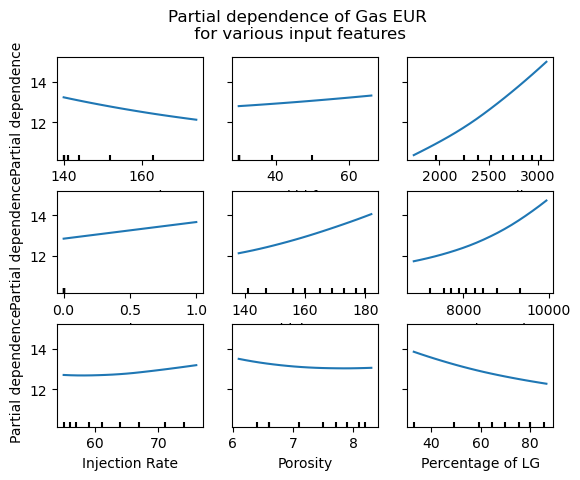

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Load the dataset
dataset = pd.read_csv('Chapter7_Shale Gas Wells.csv')

# Split the dataset into features (X) and target (y)
X = dataset.iloc[:, 0:13]
y = dataset.iloc[:, 13].values
seed = 15
np.random.seed(seed)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create and train the model
model = make_pipeline(MinMaxScaler(), MLPRegressor(hidden_layer_sizes=(25, 25),
                                                   learning_rate_init=0.01,
                                                   early_stopping=True,
                                                   max_iter=500))
model.fit(X_train, y_train)

# Evaluate the model
print("Test R2 score: {:.2f}".format(model.score(X_test, y_test)))

# List of features to plot partial dependence
features = ['Stage Spacing','bbl/ft','Proppant Loading','Dip', 'Thickness',
            'Lateral Length','Injection Rate','Porosity','Percentage of LG']

# Plot partial dependence
PartialDependenceDisplay.from_estimator(model, X, features, n_jobs=3, grid_resolution=20)

# Add title and adjust layout
fig = plt.gcf()
fig.suptitle('Partial dependence of Gas EUR\n for various input features')
fig.subplots_adjust(hspace=0.3)

plt.show()


# Important Notice
* The pipeline was used to connect the data `preprocessing step (MinMaxScaler)` and the `model (MLPRegressor)` and assemble them together.

* The
assembly **eliminates** the need to scale the data since MinMaxScaler is part of
the process within the pipeline.

* The impact of the `lateral length and
proppant loading` on `gas EUR` can be shown with a **heat map** using the
following code:

Text(0.5, 0.98, 'Gas EUR vs. Lateral Length and Proppant Loading')

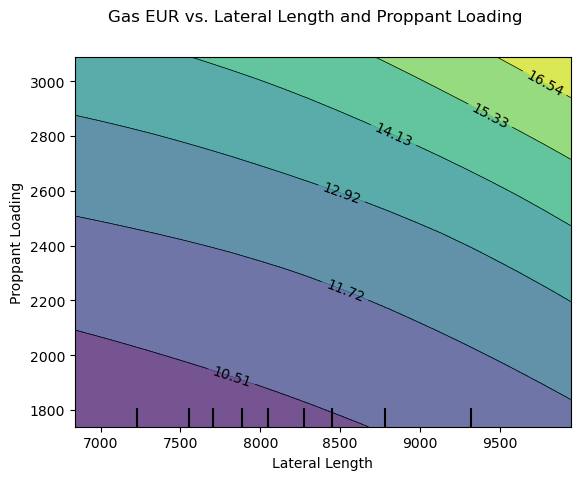

In [24]:
features_LLPL = [('Lateral Length','Proppant Loading')]

PartialDependenceDisplay.from_estimator(model,X, features_LLPL, n_jobs = 3, grid_resolution=20)

fig = plt.gcf()
fig.suptitle('Gas EUR vs. Lateral Length and Proppant Loading')

# Important Notice

### Obervation:
- As shown in Fig. 7.13, it is possible to find gas EUR at any combination of
proppant loading and lateral length.

- Based on the heat map, it is observed that
higher gas EURs are achieved by drilling longer wells and pumping more
proppant.

- **Objective**: To visualize the interaction between proppant loading and lateral length on gas EUR using a 3D surface plot.

- **Steps**:
  1. **Data Selection**: Use `Lateral Length` and `Proppant Loading` as input features and `Gas EUR` as the target.
  2. **Model Training**: Train an `MLPRegressor` model with scaled data.
  3. **Create Grid**: Generate a grid of values for lateral length and proppant loading using `np.meshgrid`.
  4. **Predict Gas EUR**: Use the trained model to predict gas EUR for each combination of lateral length and proppant loading.
  5. **3D Plot**: Use `plot_surface` from `matplotlib` to create a 3D surface plot that shows the impact of both input features on gas EUR.

- **Outcome**: A 3D surface plot that visualizes the dependency of gas EUR on lateral length and proppant loading, revealing insights on how these variables influence the target.


In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
features1 = ('Proppant Loading', 'Lateral Length')

pdp, axes = partial_dependence(model, X_train, features = features1, 
                               grid_resolution = 30)

XX, YY = np.meshgrid(axes[0], axes[1])

Z = pdp[0].T

ax= Axes3D(fig)

surf = ax.plot_surface(XX, YY, Z, rstride = 1, cstride = 1, cmap = plt.cm.BuPu,
                       edgecolor = 'k0')

ax.set_xlabel(features1[0])
ax.set_ylabel(features1[1])
ax.set_zlabel('Gas EUR')
ax.view_init(elev = 30, azim = 150)
plt.colorbar(surf)
plt.suptitle('Partial dependence of Gas EUR vs.\n Lateral Length and Proppant Loading')
plt.subplots_adjust(top = 1)
plt.show()

AttributeError: 'str' object has no attribute 'T'

<Figure size 640x480 with 0 Axes>

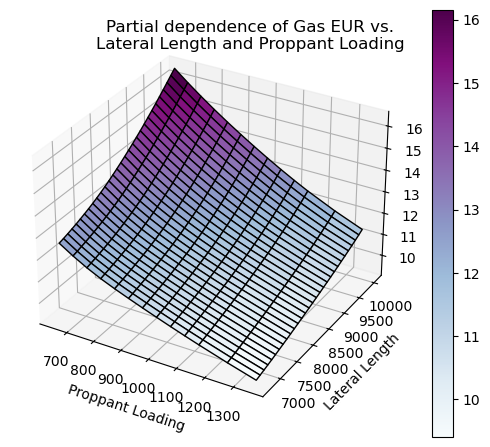

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.inspection import partial_dependence
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

# Partial dependence for features 'Proppant Loading' and 'Lateral Length'
features = [2, 5]  # Indices corresponding to 'Proppant Loading' and 'Lateral Length'

# Calculate the partial dependence
pdp_results = partial_dependence(model, X_train, features=features, grid_resolution=30)

# Extract the axes and partial dependence values
XX, YY = np.meshgrid(pdp_results["values"][0], pdp_results["values"][1])
Z = pdp_results["average"][0].T

# Create a new figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor='k')

# Set axis labels
ax.set_xlabel('Proppant Loading')
ax.set_ylabel('Lateral Length')
ax.set_zlabel('Gas EUR')


# Add colorbar and title
plt.colorbar(surf)
plt.suptitle('Partial dependence of Gas EUR vs.\nLateral Length and Proppant Loading')
plt.subplots_adjust(top=1)

# Show plot
plt.show()


# Size of training set
- "Learning Curve" is used to evaluate the impact of training sample size on model performance (Albon, 2018).
- In Python, `learning_curve` requires:
  - A machine learning model.
  - Input and output (target) data.
  - A range for training data sample sizes.
  - The number of folds for cross-validation.
  - A score metric.
- The algorithm starts with a minimum sample size, splits it into folds, trains the model, and measures the score for both train and test data.
- The process repeats, increasing the sample size, until the maximum is reached.
- The performance is visualized as a function of the number of samples.


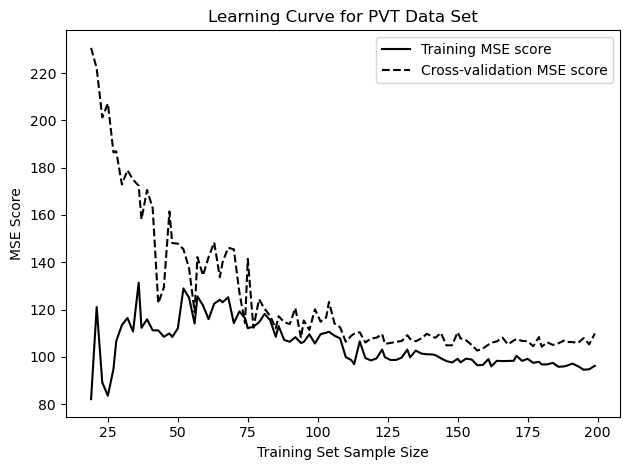

In [34]:
# PVT Probblem
import numpy as np
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

dataset = pd.read_csv('Chapter7_PVT Data.csv')

X = dataset.iloc[:,0:4]
y = dataset.iloc[:,4].values

sc=MinMaxScaler()

Xnorm=pd.DataFrame(data=sc.fit_transform(X))

seed = 50
np.random.seed(seed)

clfB = MLPRegressor(activation='relu', alpha=0.01, hidden_layer_sizes=7,
                    learning_rate_init=0.01, max_iter=500,
                    solver='lbfgs',random_state=20)

train_sample_sizes, train_MSEscores,test_MSEscores =\
    learning_curve(clfB,Xnorm,y,cv=5,scoring='neg_mean_absolute_error',
                   n_jobs=-1, train_sizes=np.linspace(0.1,1.0,100),
                   random_state=10)

train_MSEmean = np.mean(train_MSEscores, axis=1)
test_MSEmean = np.mean(test_MSEscores, axis=1)

plt.plot(train_sample_sizes, -train_MSEmean, color="k", 
         label="Training MSE score")

plt.plot(train_sample_sizes, -test_MSEmean,'--', color="k",
         label="Cross-validation MSE score")

plt.title("Learning Curve for PVT Data Set")
plt.xlabel("Training Set Sample Size"), plt.ylabel("MSE Score"),
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

Here’s a detailed breakdown of the code:

### Imports:
```python
import numpy as np
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
```
1. **`numpy`** and **`pandas`**: Libraries for numerical operations and data handling.
2. **`learning_curve`**: A function from `sklearn.model_selection` to generate the learning curve.
3. **`MLPRegressor`**: A neural network regressor from `sklearn.neural_network`.
4. **`matplotlib.pyplot`**: A library for plotting graphs.
5. **`MinMaxScaler`**: A data normalization tool from `sklearn.preprocessing` that scales features to a range.

### Loading the Dataset:
```python
dataset = pd.read_csv('Chapter7_PVT Data.csv')
```
- Loads the dataset from a CSV file.

### Splitting Input and Output:
```python
X = dataset.iloc[:,0:4]
y = dataset.iloc[:,4].values
```
- **`X`**: All columns from the dataset except the last one (assumed features).
- **`y`**: The last column (assumed target/output).

### Normalizing the Data:
```python
sc = MinMaxScaler()
Xnorm = pd.DataFrame(data=sc.fit_transform(X))
```
- **`MinMaxScaler`**: Scales all input features to a range (default: 0 to 1).
- **`Xnorm`**: Normalized version of the input data, stored as a DataFrame.

### Seeding for Reproducibility:
```python
seed = 50
np.random.seed(seed)
```
- **`np.random.seed(50)`**: Ensures consistent results across runs.

### Defining the Model:
```python
clfB = MLPRegressor(activation='relu', alpha=0.01, hidden_layer_sizes=7,
                    learning_rate_init=0.01, max_iter=500,
                    solver='lbfgs', random_state=20)
```
- **`MLPRegressor`**: A neural network model with:
  - `activation='relu'`: Rectified Linear Unit activation function.
  - `alpha=0.01`: Regularization strength (penalty for overfitting).
  - `hidden_layer_sizes=7`: Single hidden layer with 7 neurons.
  - `learning_rate_init=0.01`: Initial learning rate.
  - `max_iter=500`: Maximum number of iterations for training.
  - `solver='lbfgs'`: Optimizer for weight updates.
  - `random_state=20`: Ensures consistent results across runs.

### Generating the Learning Curve:
```python
train_sample_sizes, train_MSEscores, test_MSEscores = \
    learning_curve(clfB, Xnorm, y, cv=5, scoring='neg_mean_absolute_error',
                   n_jobs=-1, train_sizes=np.linspace(0.1,1.0,100),
                   random_state=10)
```
- **`learning_curve`**: Generates training and test scores for different training set sizes:
  - **`clfB`**: The MLPRegressor model.
  - **`Xnorm`**: Normalized input data.
  - **`y`**: Target data.
  - **`cv=5`**: 5-fold cross-validation.
  - **`scoring='neg_mean_absolute_error'`**: Evaluation metric (MAE is negative for consistency).
  - **`train_sizes=np.linspace(0.1, 1.0, 100)`**: Training set sizes ranging from 10% to 100% of the data.
  - **`n_jobs=-1`**: Uses all available CPU cores.
  - **`random_state=10`**: Ensures consistent results across runs.

### Calculating Mean Scores:
```python
train_MSEmean = np.mean(train_MSEscores, axis=1)
test_MSEmean = np.mean(test_MSEscores, axis=1)
```
- Averages the training and test MSE scores across cross-validation folds.

### Plotting the Learning Curve:
```python
plt.plot(train_sample_sizes, -train_MSEmean, color="k", 
         label="Training MSE score")

plt.plot(train_sample_sizes, -test_MSEmean, '--', color="k",
         label="Cross-validation MSE score")

plt.title("Learning Curve for PVT Data Set")
plt.xlabel("Training Set Sample Size"), plt.ylabel("MSE Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()
```
1. **Plot the training MSE**: Line plot of MSE scores for the training data.
2. **Plot the cross-validation MSE**: Dashed line for the cross-validation MSE scores.
3. **Labels and Titles**: The x-axis is labeled with "Training Set Sample Size," and the y-axis with "MSE Score". A legend distinguishes between training and test scores.
4. **`plt.tight_layout()`**: Ensures no overlapping of plot elements.
5. **`plt.show()`**: Displays the plot.

# Important Notice
*  When the number of
samples in the training data set reaches 120, the average MSE for the crossvalidation flattens to 105.
                                                             
* It means that to have the highest MSE or the best model (neural network) performance for PVT estimation problem, it is
necessary to have at least 120 PVT samples.

# Save-load Models
- After training and optimizing a machine learning model, it can be saved for future use, such as making predictions on new datasets.
- Scikit-learn models can be saved as:
  - A `"pickle"` file (Python format).
  - A `".joblib"` file (using the joblib library).
- The saved model can later be loaded for making predictions.
- In the facies classification example:
  - A random forest classifier is trained using optimized hyperparameters from grid search.
  - The model is saved.
  - The saved model can be loaded in other Python files to predict on a test dataset.


# Saving a model

In [36]:
# Saving a model for predicting facies
              
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

dataset = pd.read_csv('Chapter7_Facies Data.CSV')
x = dataset.iloc[:,4:11]
y = dataset.iloc[:,0].values

import numpy as np
seed = 50
np.random.seed(seed)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

model = make_pipeline(MinMaxScaler(),
                      RandomForestClassifier(max_features=2, n_estimators=80,
                                             random_state=0))

rfmodel1 = model.fit(x_train,y_train)

from joblib import dump
dump(rfmodel1,"rfmodel1.joblib")

['rfmodel1.joblib']

# Loading the saved model

In [37]:
# Loading the saved model 
import pandas as pd
from joblib import load

dataset = pd.read_csv('Chapter7_Facies Data.CSV')
x = dataset.iloc[:,4:11]
y = dataset.iloc[:,0].values

import numpy as np
seed = 50
np.random.seed(seed)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3)

Model = load('rfmodel1.joblib')

yModel = Model.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, yModel))

              precision    recall  f1-score   support

           1       0.92      0.73      0.82        82
           2       0.73      0.86      0.79       215
           3       0.78      0.71      0.74       181
           4       0.61      0.61      0.61        51
           5       0.60      0.38      0.47        68
           6       0.60      0.60      0.60       142
           7       0.81      0.64      0.71        33
           8       0.60      0.76      0.67       139
           9       0.98      0.75      0.85        59

    accuracy                           0.71       970
   macro avg       0.74      0.67      0.69       970
weighted avg       0.72      0.71      0.71       970

